In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


# Merge excel files
path = "datasets/output/data_cleaned.xlsx"

dataset_df = pd.read_excel(path)

In [3]:
dataset_df = dataset_df[['CCAN', 'DATE', 'Status', 'TOT NET', 'Net Investment', '31-60', '61-90', '91-120', '120+', 'Past Due', 'Aging', 'Country']]

dataset_df.count()

CCAN              140236
DATE              140236
Status            140236
TOT NET           140236
Net Investment    140236
31-60             140236
61-90             140236
91-120            140236
120+              140236
Past Due          140236
Aging             140236
Country           140236
dtype: int64

In [18]:
# Count number of months as input
input_files = os.listdir("datasets/input/")
input_count = len(input_files)

# Create average per month past due and in millions per month
extended_dataset_df = dataset_df
extended_dataset_df["Past Due AVG"] = round(extended_dataset_df["Past Due"] / input_count, 2)
extended_dataset_df["Past Due AVG MLN"] = round(extended_dataset_df["Past Due AVG"] / 1000000, 2)
extended_dataset_df["Net Investment AVG"] = round(extended_dataset_df["Net Investment"] / input_count, 2)
extended_dataset_df["Net Investment AVG MLN"] = round(extended_dataset_df["Net Investment AVG"] / 1000000, 2)
extended_dataset_df["Year"] = pd.DatetimeIndex(extended_dataset_df['DATE']).year
extended_dataset_df["Past Due MLN"] = round(extended_dataset_df["Past Due"] / 1000000, 2)
extended_dataset_df["TOT NET MLN"] = round(extended_dataset_df["TOT NET"] / 1000000, 2)

extended_dataset_df.head()

,CCAN,DATE,Status,TOT NET,Net Investment,31-60,61-90,91-120,120+,Past Due,Aging,Country,Past Due AVG,Past Due AVG MLN,Net Investment AVG,Net Investment AVG MLN,Year,Past Due MLN,TOT NET MLN
0,320023,2016-01-01,LEGAL,1.534098e+09,15555962.86,0.00,0.00,0.00,15555962.86,15555962.86,120+,MEXICO,204683.72,0.20,204683.72,0.20,2016,15.56,1534.1
1,315112,2016-01-01,LEGAL,1.534098e+09,3265682.10,0.00,0.00,0.00,3265682.10,3265682.10,120+,MEXICO,42969.50,0.04,42969.50,0.04,2016,3.27,1534.1
2,309348,2016-01-01,REGULAR,1.534098e+09,3006305.90,0.00,356160.13,1678580.73,971565.04,3006305.90,120+,COSTA RICA,39556.66,0.04,39556.66,0.04,2016,3.01,1534.1
3,320248,2016-01-01,REGULAR,1.534098e+09,2874745.56,0.00,1191181.78,1683563.78,0.00,2874745.56,91-120,MEXICO,37825.60,0.04,37825.60,0.04,2016,2.87,1534.1
4,308247,2016-01-01,REGULAR,1.534098e+09,2556572.66,729813.89,0.00,1826758.77,0.00,2556572.66,91-120,GUATEMALA,33639.11,0.03,33639.11,0.03,2016,2.56,1534.1


In [5]:
input_count

76

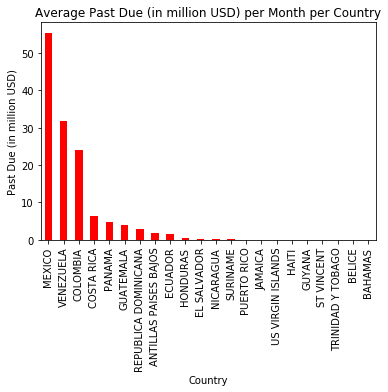

In [6]:
# Calculate average Past Due in million USD per month per country
country_count = extended_dataset_df.groupby(["Country"])["Past Due AVG MLN"].sum()

# Plot bar graph
country_count = country_count.sort_values(ascending=False)
country_count.plot(kind="bar", facecolor="red")

plt.ylabel("Past Due (in million USD)")
plt.xlabel("Country")
plt.title("Average Past Due (in million USD) per Month per Country")
plt.show()

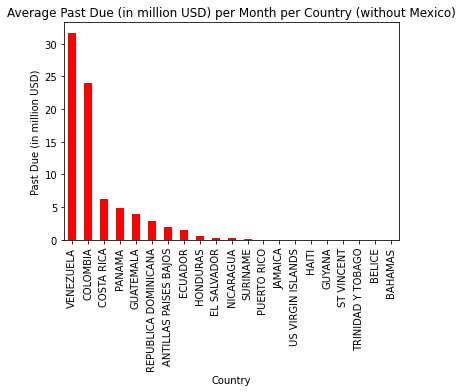

In [20]:
# Get dataset without Mexico
ext_dat_nomx_df = extended_dataset_df.loc[(extended_dataset_df["Country"] != 'MEXICO')].dropna()

# Calculate average Past Due in USD per month per country
country_count2 = ext_dat_nomx_df.groupby(["Country"])["Past Due AVG MLN"].sum()
country_count2 = country_count2.sort_values(ascending=False)
country_count2.plot(kind="bar", facecolor="red")

plt.ylabel("Past Due (in million USD)")
plt.xlabel("Country")
plt.title("Average Past Due (in million USD) per Month per Country (without Mexico)")
plt.show()                                        
                                          

In [8]:
# Count length of unique customers

customers = extended_dataset_df['CCAN']
set_cust = set(customers)
uni_cust = len(set_cust)

uni_cust

6119

In [9]:
years = extended_dataset_df["Year"].unique().tolist()

years

[2016, 2015, 2014, 2017, 2018, 2019, 2020]

In [21]:
def year_overview(yearyear):
    year_df = extended_dataset_df.loc[(extended_dataset_df["Year"] == yearyear)].dropna()
    # Group by customer
    customer_gbdf = year_df.groupby(['CCAN'])
    #customer_gbdf = extended_dataset_df.groupby(['CCAN'])

    #customer_gbdf = customer_gbdf[['CCAN', 'Net Investment AVG MLN']]

    # Past Due Count
    cust_pd_count = customer_gbdf['Net Investment AVG MLN'].sum()
    cust_country = customer_gbdf['Country'].unique().str[0]

    #summary table
    sum_cust_pd_df = pd.DataFrame({
            "Net Investment AVG MLN":cust_pd_count,
            "Country":cust_country})
    sum_cust_pd_df.index.name="CCAN"

    sum_cust_pd_df = sum_cust_pd_df.reset_index()
    # Filter top four countries out of DF
    sum_cust_pd_df = sum_cust_pd_df.loc[((sum_cust_pd_df["Country"] == 'MEXICO') | (sum_cust_pd_df["Country"] == 'VENEZUELA')
                                         | (sum_cust_pd_df["Country"] == 'COLOMBIA') | (sum_cust_pd_df["Country"] == 'COSTA RICA')
                                        )].dropna()


    # get dataframe sorted by life Expectancy in each continent 
    top_net_inv = sum_cust_pd_df.groupby(["Country"]).apply(lambda x: x.sort_values(["Net Investment AVG MLN"], ascending = False)).reset_index(drop=True)
    # select top N rows within each continent
    top_net_inv = top_net_inv.groupby('Country').head(2)
    #number = year
    
    #print("Top two NET Investment per country in year: ")
    #x = top_net_inv['Country']
    #x_value = top_net_inv['CCAN']
    #y_value = top_net_inv['Net Investment AVG MLN']
    #colour = 
    #top_net_inv.plot.bar(x_value,y_value, rot=0)
    return top_net_inv
    

In [22]:
year_overview(2014)


,CCAN,Net Investment AVG MLN,Country
0,308653,2.42,COLOMBIA
1,19746,0.19,COLOMBIA
126,314798,3.96,COSTA RICA
127,314376,1.60,COSTA RICA
302,316076,10.88,MEXICO
303,309306,10.46,MEXICO
1418,317746,10.72,VENEZUELA


In [23]:
year_overview(2015)

,CCAN,Net Investment AVG MLN,Country
0,308653,2.42,COLOMBIA
1,19762,0.35,COLOMBIA
196,314798,4.96,COSTA RICA
197,314376,2.42,COSTA RICA
386,309306,16.55,MEXICO
387,312097,13.72,MEXICO
1608,317746,12.62,VENEZUELA


In [24]:
year_overview(2016)

,CCAN,Net Investment AVG MLN,Country
0,357314,0.96,COLOMBIA
1,19793,0.46,COLOMBIA
270,314798,7.56,COSTA RICA
271,314376,4.21,COSTA RICA
474,309306,23.16,MEXICO
475,316076,7.87,MEXICO
1684,317746,16.00,VENEZUELA


In [25]:
year_overview(2017)

,CCAN,Net Investment AVG MLN,Country
0,357314,0.80,COLOMBIA
1,8914,0.79,COLOMBIA
344,314798,5.85,COSTA RICA
345,314376,4.14,COSTA RICA
790,309306,31.47,MEXICO
791,309306,6.84,MEXICO
2755,317746,11.51,VENEZUELA
2756,R-82,1.35,VENEZUELA


In [10]:
path1 = "datasets/output/exchange_rates.csv"
exchange_rates_df = pd.read_csv(path1)
exchange_rates_df

,Unnamed: 0,Date,Exhange Rate
0,0,2012-01-31,12.980045
1,1,2012-02-28,12.840447
2,2,2012-03-31,12.710813
3,3,2012-04-30,12.993272
4,4,2012-05-31,14.241763
...,...,...,...
99,99,2020-04-30,24.230800
100,100,2020-05-31,22.185207
101,101,2020-06-30,23.019400
102,102,2020-07-31,22.283049


            Total Past Due  Total Net  Past Due Rate
DATE                                                
2014-04-01          212.32    1475.27       0.143919
2014-05-01           74.57    1586.63       0.046999
2014-06-01           94.45    1525.45       0.061916
2014-07-01           86.18    1597.91       0.053933
2014-08-01          105.76    1535.10       0.068895
...                    ...        ...            ...
2020-03-01          189.17    1144.26       0.165321
2020-04-01          192.53    1136.23       0.169446
2020-05-01          214.43    1159.34       0.184959
2020-06-01          212.24    1183.65       0.179310
2020-07-01          206.42    1166.09       0.177019

[76 rows x 3 columns]


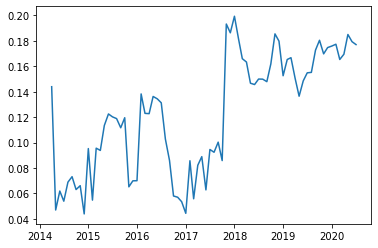

In [23]:
new_extended_dataset_df = extended_dataset_df.groupby(['DATE'])
#print(new_extended_dataset_df)
sum_past_due = new_extended_dataset_df['Past Due MLN'].sum()
total_net = new_extended_dataset_df['TOT NET MLN'].unique().str[0]
past_due_index = pd.DataFrame({
    "Total Past Due": sum_past_due,
    "Total Net": total_net,
    "Past Due Rate": sum_past_due / total_net
    
})
print(past_due_index )

y = past_due_index['Past Due Rate']
x = past_due_index.index
plt.plot(x,y)
